In [56]:
# Predict median house cost in California Project
import pandas as pd
import numpy as np
import sklearn # scikit-learn library
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# as we can see there is 207 missing points in total_bedrooms we should fill it
# lets see ocean proximity
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# statistic infos
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


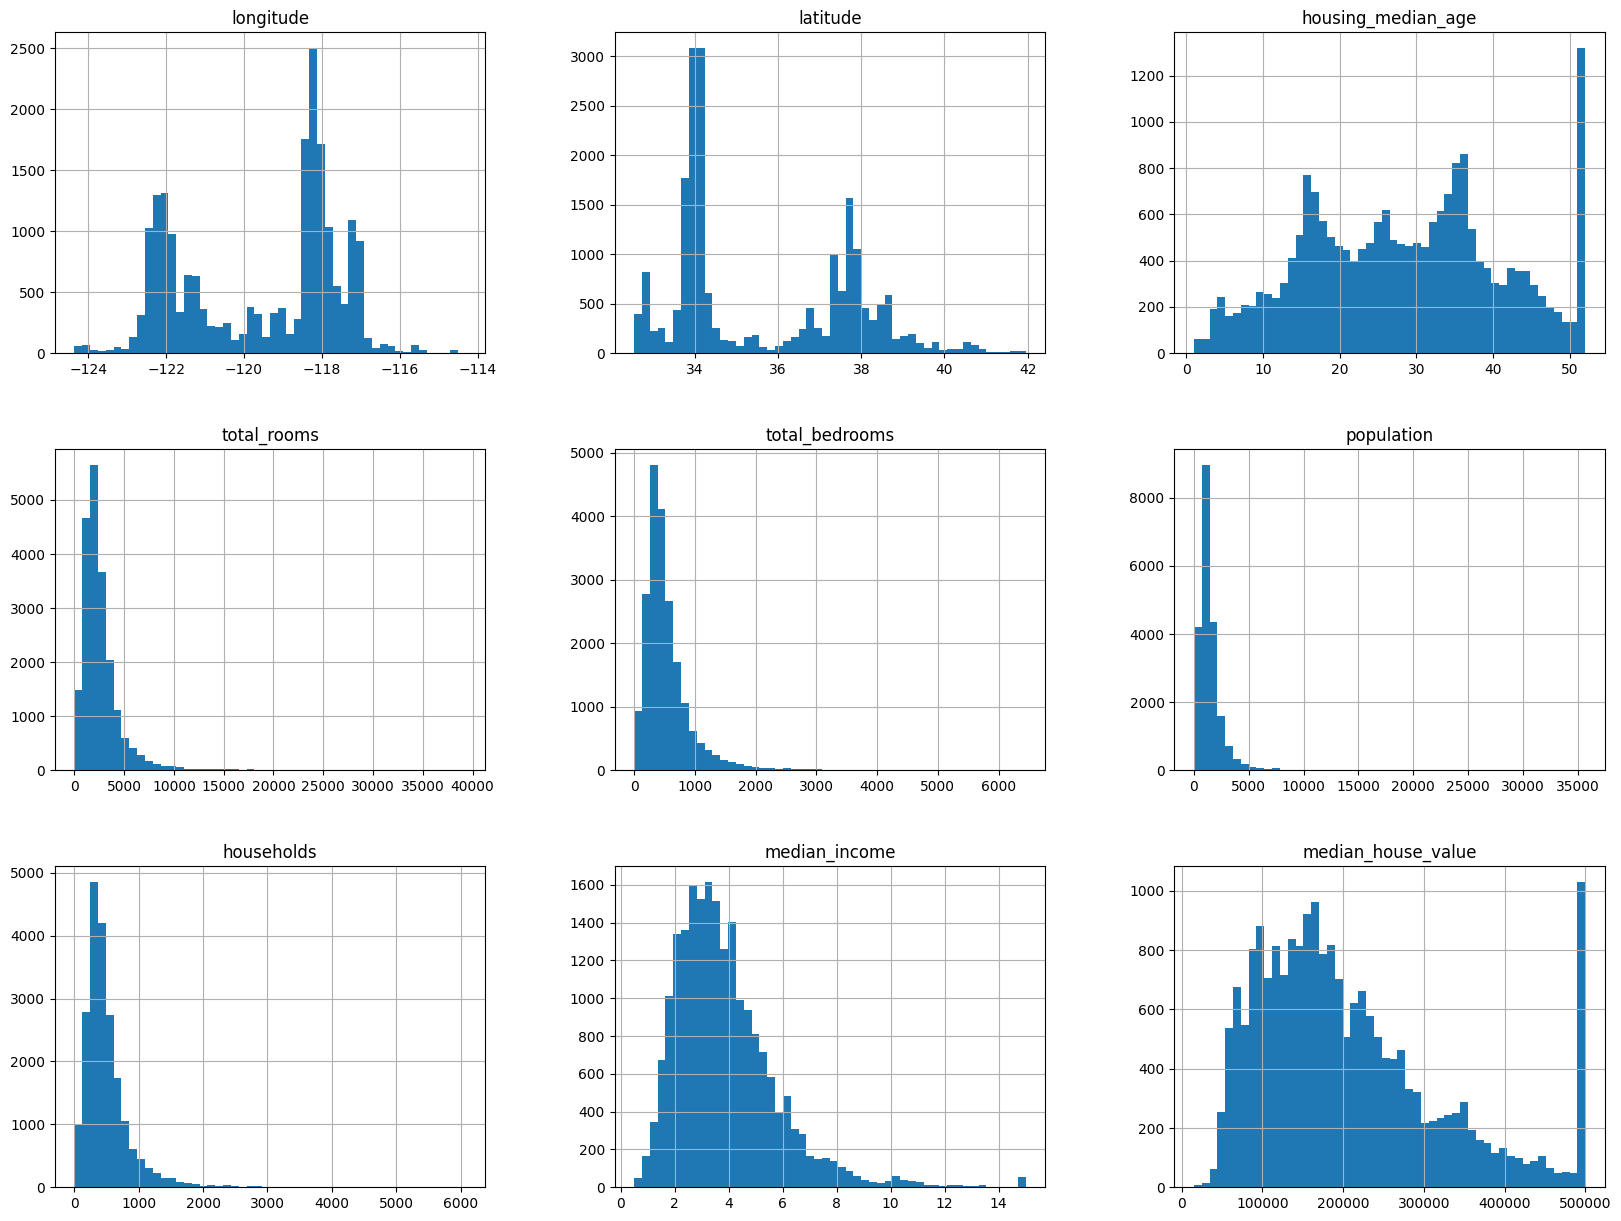

In [6]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
# bins=50: This parameter specifies the number of bins to use for each histogram.
# In this case, it sets the number of bins to 50.
# Bins are intervals into which the data is grouped.
plt.show()

# Train vs Test set

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, train_size=0.8, random_state=30)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7186,-118.18,34.03,39.0,609.0,145.0,690.0,134.0,2.9167,145800.0,<1H OCEAN
7686,-118.10,33.93,35.0,1622.0,302.0,845.0,284.0,4.5769,186100.0,<1H OCEAN
6332,-117.95,33.99,24.0,1219.0,177.0,610.0,185.0,6.7978,325000.0,<1H OCEAN
14192,-117.07,32.69,20.0,2192.0,406.0,1766.0,393.0,4.0921,135000.0,NEAR OCEAN
6611,-118.11,34.18,52.0,3571.0,510.0,1434.0,490.0,5.9009,376000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
500,-122.27,37.85,52.0,1974.0,426.0,875.0,363.0,1.5817,153600.0,NEAR BAY
12077,-117.64,33.87,2.0,17470.0,2727.0,5964.0,1985.0,6.2308,257900.0,<1H OCEAN
15277,-117.34,33.06,17.0,2718.0,518.0,815.0,403.0,4.3182,357100.0,NEAR OCEAN
4517,-118.20,34.04,44.0,1399.0,386.0,1419.0,373.0,1.8224,143800.0,<1H OCEAN


In [8]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19449,-121.03,37.68,20.0,3204.0,625.0,2016.0,605.0,2.6567,110400.0,INLAND
10452,-117.66,33.46,26.0,2073.0,370.0,952.0,340.0,5.0877,288100.0,<1H OCEAN
18982,-122.01,38.26,12.0,4132.0,710.0,2087.0,633.0,4.5987,139700.0,INLAND
8187,-118.11,33.78,16.0,3985.0,567.0,1327.0,564.0,7.9767,500001.0,<1H OCEAN
15759,-122.44,37.77,52.0,2994.0,736.0,1428.0,700.0,3.0766,438900.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
12704,-121.41,38.58,18.0,6955.0,1882.0,2803.0,1740.0,3.0890,141400.0,INLAND
18742,-122.34,40.57,26.0,2187.0,472.0,1339.0,463.0,2.0395,67900.0,INLAND
19142,-122.69,38.32,15.0,2536.0,414.0,1400.0,426.0,5.6613,172400.0,<1H OCEAN
1027,-120.55,38.46,16.0,1443.0,249.0,435.0,181.0,3.2031,129200.0,INLAND


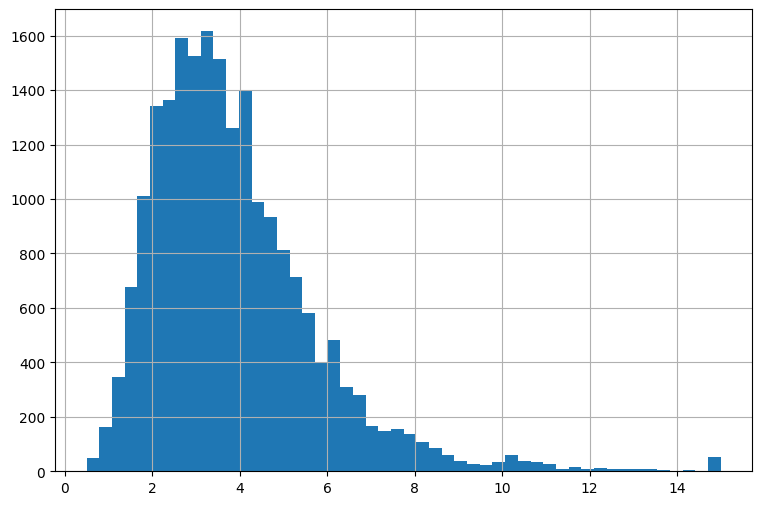

In [9]:
%matplotlib inline
df['median_income'].hist(bins=50, figsize=(9,6))
plt.show()

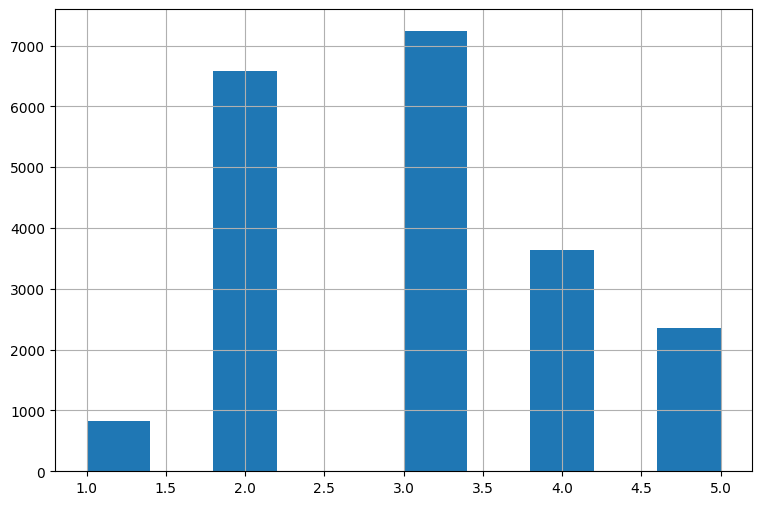

In [10]:
bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf]
df['income_cut'] = pd.cut(df.median_income, bins=bins, labels=[1,2,3,4,5])
df.income_cut.hist(figsize=(9,6))
plt.show()

In [11]:
# If we want equally devision by median income
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=30)
for train_index, test_index in stratified_split.split(df, df.income_cut):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [12]:
strat_train_set.drop('income_cut', axis=1, inplace=True)
strat_test_set.drop('income_cut', axis=1, inplace=True)

In [13]:
housing = strat_train_set.copy()

# Visualization

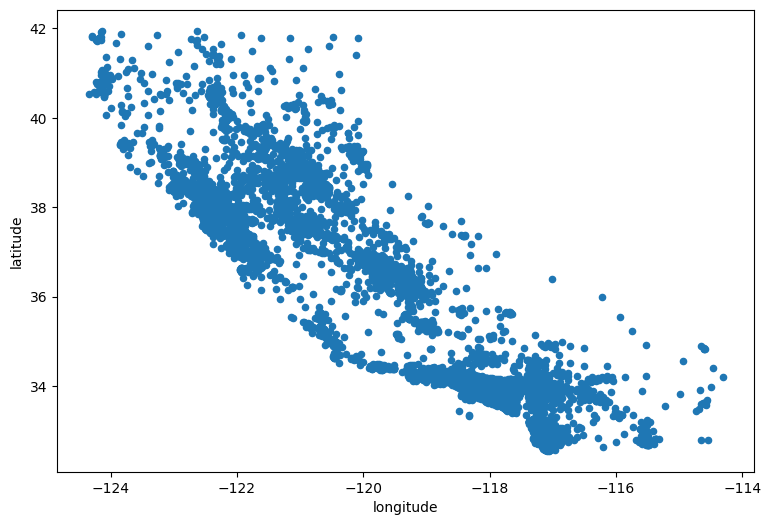

In [14]:
# Lets visualize California map
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(9,6))
plt.show()

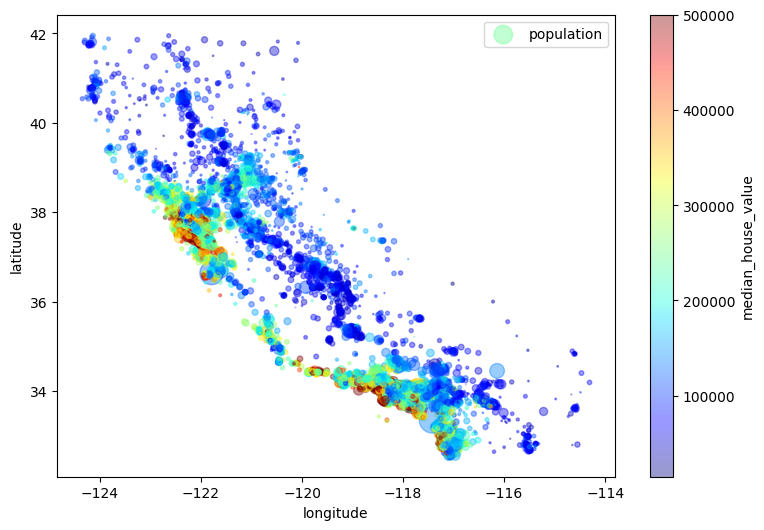

In [15]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(9,6),
             alpha=0.4, s=housing['population']/100,
             label="population", c='median_house_value', cmap='jet', colorbar=True)
plt.show()

# Correlation

In [16]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

<ipython-input-16-06005d947a51>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing['median_house_value']).sort_values(ascending=False)


median_house_value    1.000000
median_income         0.690500
total_rooms           0.133925
housing_median_age    0.101353
households            0.063882
total_bedrooms        0.047485
population           -0.022558
longitude            -0.046643
latitude             -0.144072
dtype: float64

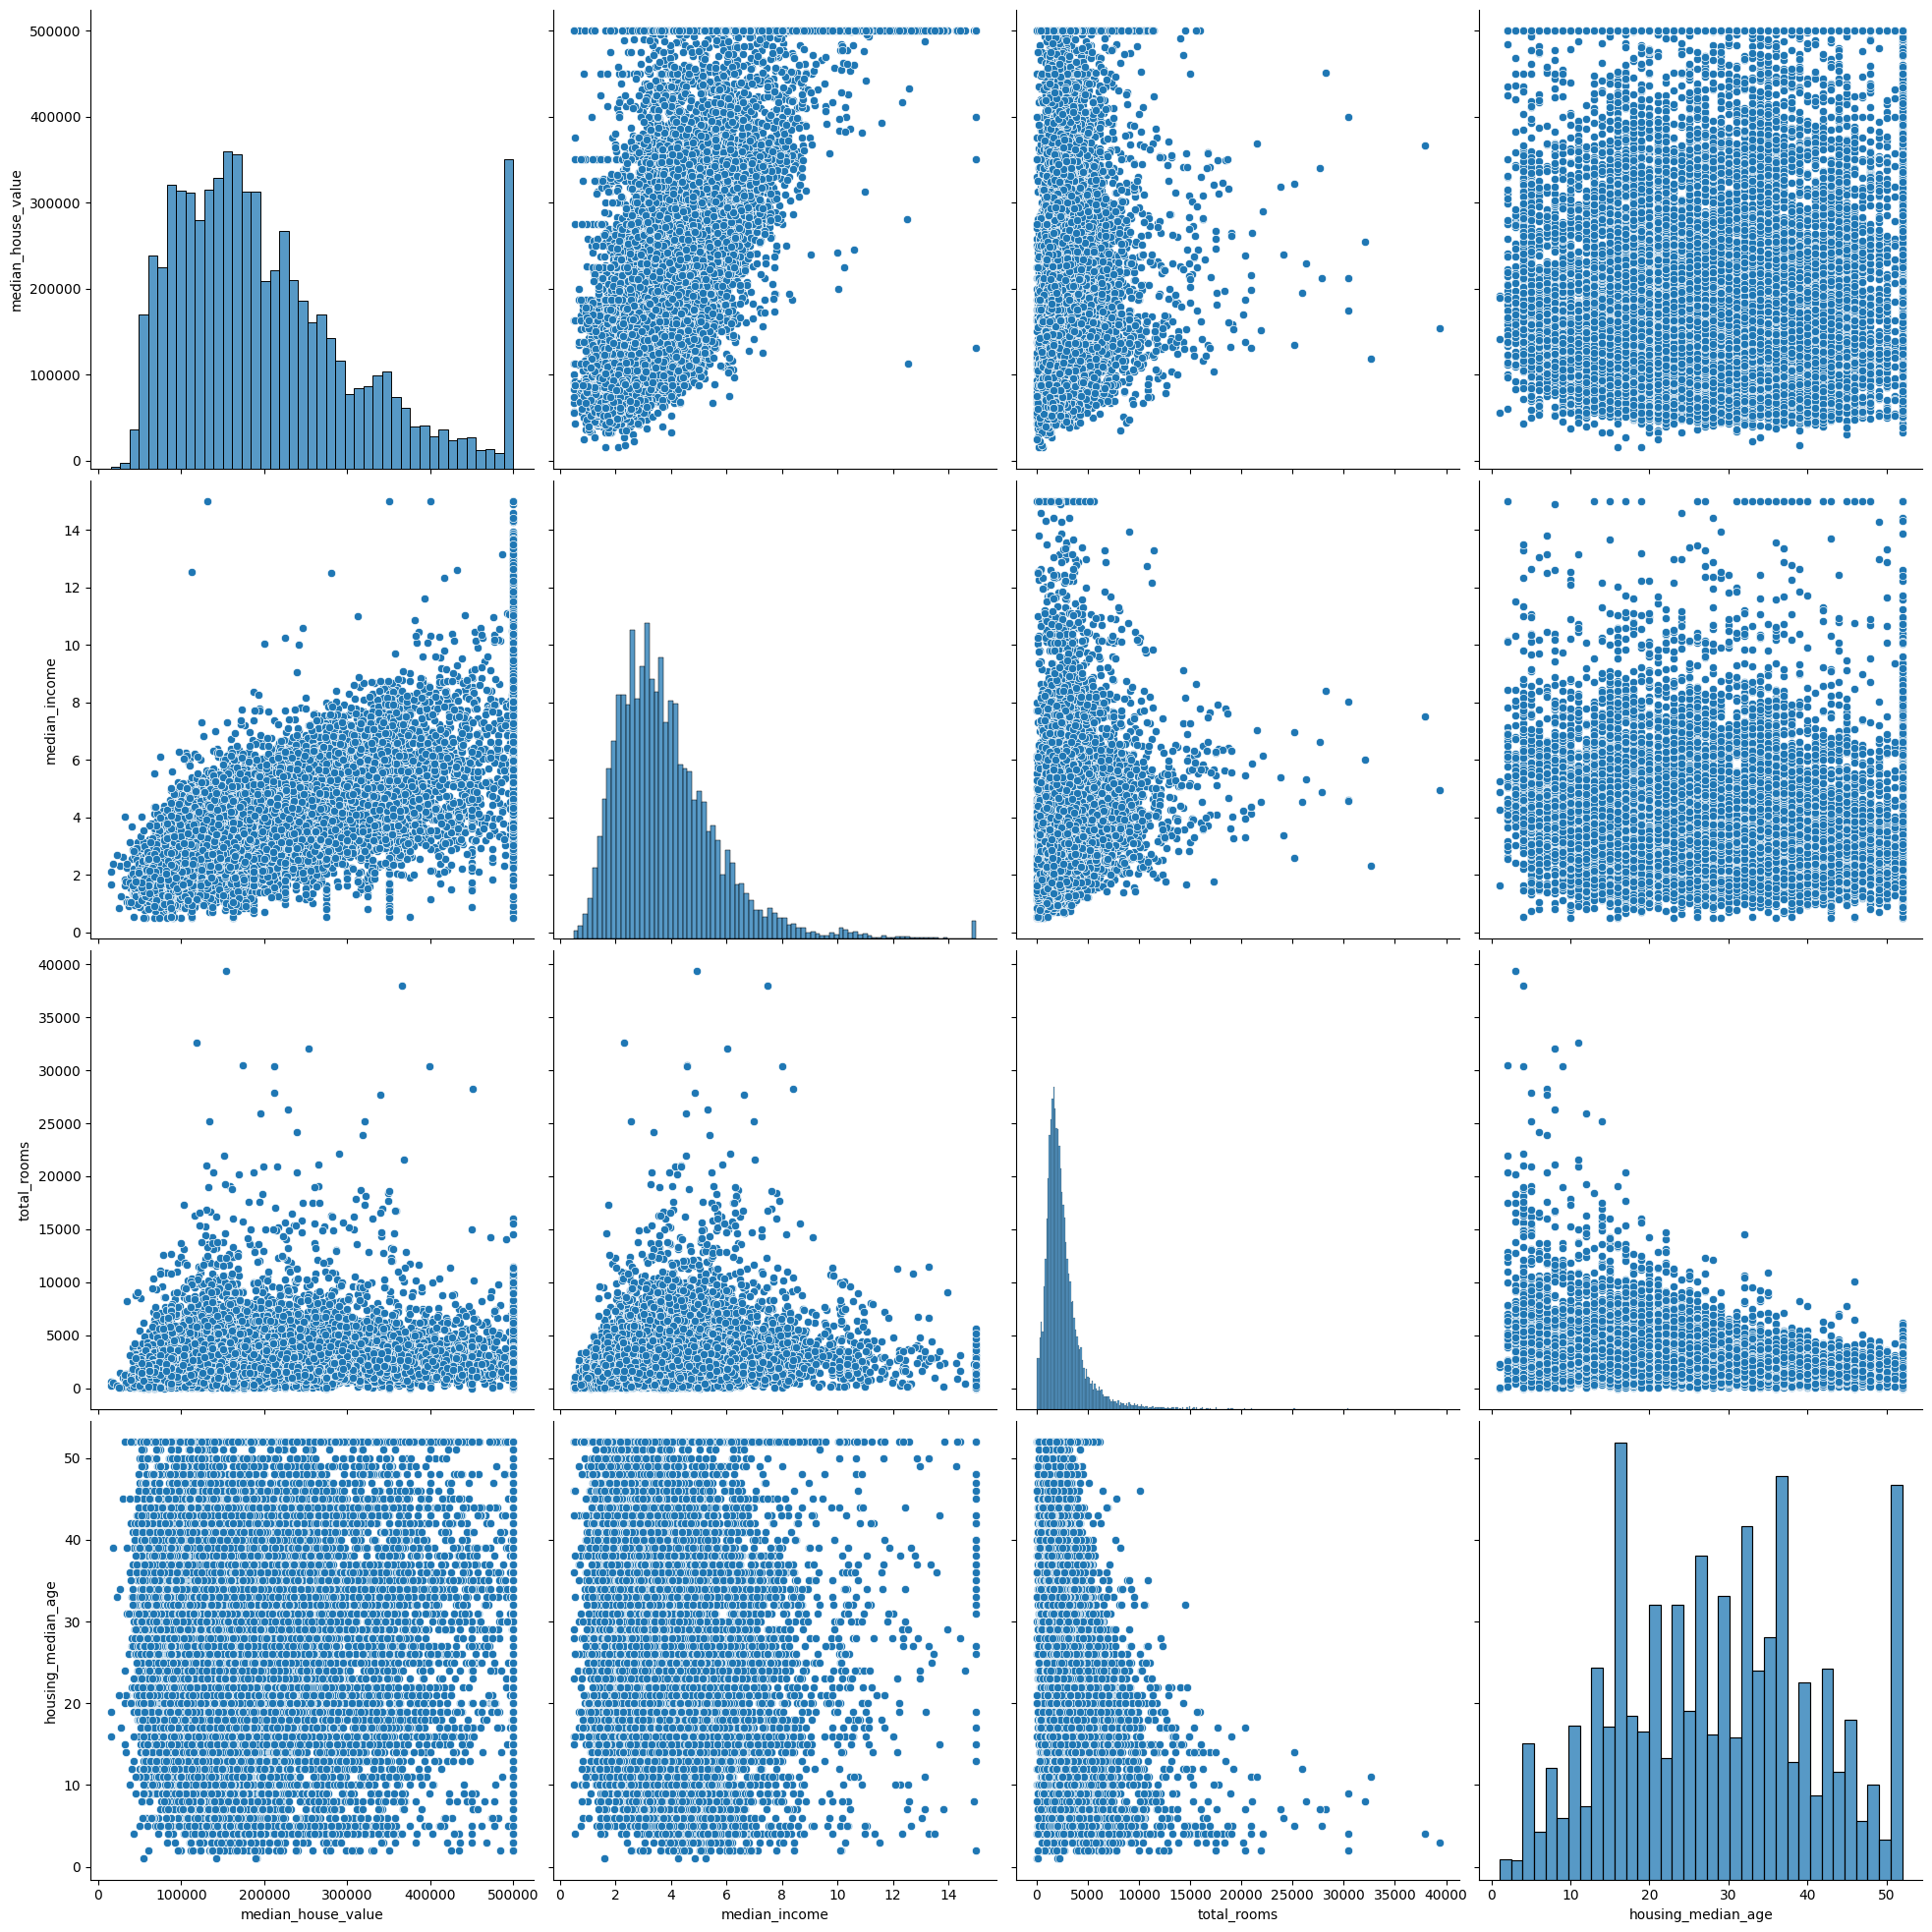

In [17]:
cols = ['median_house_value','median_income','total_rooms','housing_median_age']
sns.pairplot(housing[cols], height=5)
plt.show()

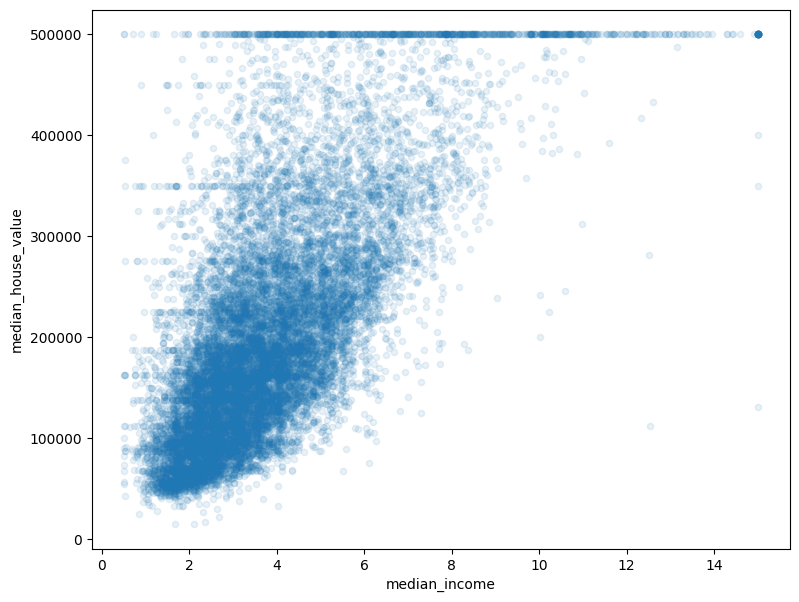

In [18]:
housing.plot(kind='scatter', x="median_income", y="median_house_value", alpha=0.1, figsize=(9,7))
plt.show()

In [19]:
# New Parametrs
housing['rooms_per_household'] = housing.total_rooms/housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms/housing.total_rooms
housing['population_per_household'] = housing.population/housing.households

In [20]:
housing.corrwith(housing.median_house_value).sort_values(ascending=False)

<ipython-input-20-1b01da132a87>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing.median_house_value).sort_values(ascending=False)


median_house_value          1.000000
median_income               0.690500
rooms_per_household         0.156798
total_rooms                 0.133925
housing_median_age          0.101353
households                  0.063882
total_bedrooms              0.047485
population                 -0.022558
population_per_household   -0.031648
longitude                  -0.046643
latitude                   -0.144072
bedrooms_per_room          -0.263216
dtype: float64

# ML preprocessing

In [21]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cut          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
# Fill NaN values with Simple Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [25]:
housing_num = housing.drop("ocean_proximity", axis=1) # we should only have numeric values
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2137.    ,  437.    , 1170.    ,
        411.    ,    3.5313])

In [27]:
X = imputer.transform(housing_num)
type(X)

numpy.ndarray

In [28]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.isna().sum() # done no NaN value

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

String value must be turned to numeric value for that we have two methods 1 OrdinalEncoder 2 OneHotEncoder. Let's them their difference

In [32]:
# OrdinalEncoder
housing_cat = housing[['ocean_proximity']]

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10] # turned into ordinal numbers

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [4.],
       [0.],
       [4.],
       [3.]])

In [33]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

# Transfomer

Let's write transformer ourselves to add columns automatically

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_id, bedrooms_id, population_id, households_id = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__ (self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # we want only transform
  def transform(self, X):
    rooms_per_household = X[:, rooms_id] / X[:, households_id]
    population_per_household = X[:,population_id] / X[:, households_id]
    if self.add_bedrooms_per_room:
          bedrooms_per_room = X[:, bedrooms_id] / X[:, rooms_id]
          return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
          return np.c_[X, rooms_per_household, population_per_household]

In [48]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs[0,:]

array([-118.43, 34.19, 27.0, 3440.0, 739.0, 1827.0, 712.0, 4.125,
       '<1H OCEAN', 4.831460674157303, 2.566011235955056,
       0.21482558139534882], dtype=object)

In [49]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs[0,:]

array([-118.43, 34.19, 27.0, 3440.0, 739.0, 1827.0, 712.0, 4.125,
       '<1H OCEAN', 4.831460674157303, 2.566011235955056], dtype=object)

# Standardization and normalization

In [52]:
# Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

min_max_scaler.fit_transform(housing_num) # return 0 to 1

array([[0.58964143, 0.17446809, 0.50980392, ..., 0.05112251, 0.11692156,
        0.25000345],
       [0.687251  , 0.14468085, 0.54901961, ..., 0.03797752, 0.06808091,
        0.22299003],
       [0.32071713, 0.55212766, 0.52941176, ..., 0.00675467, 0.01595132,
        0.20443856],
       ...,
       [0.72609562, 0.01382979, 0.78431373, ..., 0.046554  , 0.08403223,
        0.12931546],
       [0.75697211, 0.0287234 , 0.31372549, ..., 0.03416576, 0.07268541,
        0.42318037],
       [0.59262948, 0.15425532, 0.84313725, ..., 0.02827994, 0.06018747,
        0.28749948]])

In [54]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
standart_scaler.fit_transform(housing_num) # standard deviation

array([[ 0.574186  , -0.68052808, -0.12575819, ...,  0.33927934,
         0.54032938,  0.13048501],
       [ 1.0627503 , -0.81153494,  0.03282736, ..., -0.06725515,
        -0.22765643, -0.07426184],
       [-0.7718585 ,  0.98045177, -0.04646541, ..., -1.0328829 ,
        -1.04735846, -0.21487176],
       ...,
       [ 1.25717895, -1.38702937,  0.98434071, ...,  0.1979891 ,
         0.02316722, -0.7842635 ],
       [ 1.4117248 , -1.32152594, -0.91868598, ..., -0.18514148,
        -0.15525373,  1.44307071],
       [ 0.58914205, -0.76942559,  1.22221904, ..., -0.36717185,
        -0.35177535,  0.4146843 ]])

In [55]:
housing_onehot = pd.get_dummies(housing['ocean_proximity'])
housing_onehot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3835,1,0,0,0,0
11955,0,1,0,0,0
16503,0,1,0,0,0
19971,0,1,0,0,0
1586,0,1,0,0,0
...,...,...,...,...,...
3329,1,0,0,0,0
17179,0,0,0,0,1
14214,0,0,0,0,1
15604,1,0,0,0,0


# PipeLine

In [62]:
from sklearn.pipeline import Pipeline
# for numeric values
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
num_pipeline.fit_transform(housing_num)

array([[ 0.574186  , -0.68052808, -0.12575819, ..., -0.25713658,
        -0.07133014,  0.01911537],
       [ 1.0627503 , -0.81153494,  0.03282736, ...,  0.07056211,
         0.03893346, -0.48217317],
       [-0.7718585 ,  0.98045177, -0.04646541, ..., -0.54126184,
        -0.08322882,  0.6197225 ],
       ...,
       [ 1.25717895, -1.38702937,  0.98434071, ..., -0.09580594,
         0.03545369, -0.30940047],
       [ 1.4117248 , -1.32152594, -0.91868598, ...,  0.92001316,
        -0.0412844 , -1.06414003],
       [ 0.58914205, -0.76942559,  1.22221904, ...,  0.15332004,
        -0.04143612, -0.48923588]])

In [63]:
# Both
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])
housing_pre = full_pipeline.fit_transform(housing)
housing_pre

array([[ 0.574186  , -0.68052808, -0.12575819, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.0627503 , -0.81153494,  0.03282736, ...,  0.        ,
         0.        ,  0.        ],
       [-0.7718585 ,  0.98045177, -0.04646541, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25717895, -1.38702937,  0.98434071, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.4117248 , -1.32152594, -0.91868598, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58914205, -0.76942559,  1.22221904, ...,  0.        ,
         0.        ,  0.        ]])